In [1]:
import json
import os
import pandas as pd

from util.config import versioned

matched_all = versioned.read_parquet("matched.parquet")
matched_all = matched_all[matched_all["overall_score"] >= 11]
matched_all

,overall_score,koryta_name,krs_name,pkw_name,wiki_name,birth_year,birth_date,employed_end,employed_krs,is_polityk,...,first_name_6,last_name_7,second_name_8,metaphone_9,birth_year_10,full_name_11,wiki_name_1,is_polityk_1,wiki_score,koryta_name_1
0,34.499489,Ludwik Rakowski,Ludwik Jerzy Rakowski,Rakowski Ludwik,Ludwik Jerzy Rakowski,1975,1975-10-02,"[2017-04-06T00:00:00.000000, 2025-10-07T00:00:...","[0000036568, 0000146138, 0000146143, 0000206762]",Polityk,...,ludwik,rakowski,,"[RKSK, RKFSK]",1975,[Rakowski Ludwik],Ludwik Jerzy Rakowski,Polityk,1.499489,Ludwik Rakowski
1,34.499489,Ludwik Rakowski,Ludwik Jerzy Rakowski,Rakowski Ludwik Jerzy,Ludwik Jerzy Rakowski,1975,1975-10-02,"[2017-04-06T00:00:00.000000, 2025-10-07T00:00:...","[0000036568, 0000146138, 0000146143, 0000206762]",Polityk,...,ludwik,rakowski,jerzy,"[RKSK, RKFSK]",1975,"[Rakowski Ludwik Jerzy, RAKOWSKI Ludwik Jerzy]",Ludwik Jerzy Rakowski,Polityk,1.499489,Ludwik Rakowski
2,34.460139,Piotr Grzymowicz,Piotr Grzymowicz,Grzymowicz Piotr Władysław,Piotr Władysław Grzymowicz,1954,1954-01-11,[2025-02-25T00:00:00.000000],[0000033455],Polityk,...,piotr,grzymowicz,władysław,"[KRSMTS, KRTSMF]",1954,"[Grzymowicz Piotr Władysław, GRZYMOWICZ Piotr ...",Piotr Władysław Grzymowicz,Polityk,1.460139,Piotr Grzymowicz
3,34.428899,Adam Struzik,Adam Krzysztof Struzik,Struzik Adam Krzysztof,Adam Krzysztof Struzik,1957,1957-01-01,"[2025-10-07T00:00:00.000000, 2016-05-20T00:00:...","[0000145910, 0000238773]",Polityk,...,adam,struzik,krzysztof,"[STRSK, STRTSK]",1957,[Struzik Adam Krzysztof],Adam Krzysztof Struzik,Polityk,1.428899,Adam Struzik
4,34.035097,Robert Kropiwnicki,Robert Kropiwnicki,Kropiwnicki Robert,Robert Kropiwnicki,1974,1974-07-23,[2011-05-09T00:00:00.000000],[0000073983],Biogram,...,robert,kropiwnicki,,[KRPNK],1974,[Kropiwnicki Robert],Robert Kropiwnicki,Biogram,1.535097,Robert Kropiwnicki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,11.107149,None,Andrzej Bazyli Matejuk,None,Andrzej Matejuk,1953,1953-02-08,[2016-06-20T00:00:00.000000],[0000295859],None,...,None,None,None,None,<NA>,None,Andrzej Matejuk,None,1.107149,None
5457,11.107149,None,Dariusz Zawadka,None,Dariusz Zawadka,1967,1967-01-23,[2016-01-28T00:00:00.000000],[0000069559],None,...,None,None,None,None,<NA>,None,Dariusz Zawadka,None,1.107149,None
5458,11.107149,None,Weronika Olena Marczuk,None,Weronika Olena Marczuk,1971,1971-11-28,[2010-03-25T00:00:00.000000],[0000207167],None,...,None,None,None,None,<NA>,None,Weronika Olena Marczuk,None,1.107149,None
5459,11.000000,None,Dariusz Daniluk,None,Dariusz Daniluk,1963,1963-05-30,"[2014-07-10T00:00:00.000000, 2014-07-03T00:00:...","[0000009831, 0000006291, 0000238773]",Polityk,...,None,None,None,None,<NA>,None,Dariusz Daniluk,Polityk,0.000000,None


In [8]:
people_krs = pd.DataFrame(versioned.read_jsonl("people_krs.jsonl"))
people_krs

,id,first_name,last_name,full_name,employed_krs,employed_end,birth_date,second_names,sex
0,1219062,Dariusz,Kwiatkowski,Dariusz Jakub Kwiatkowski,0000002251,2025-10-07,1984-05-22,Jakub,M
1,1401777,Jakub,Ufnal,Jakub Cezary Ufnal,0000002251,2025-10-07,1985-05-01,Cezary,M
2,413693,Ireneusz,Zdun,Ireneusz Adam Zdun,0000002251,2025-10-07,1961-12-23,Adam,M
3,413692,Marek,Łach,Marek Andrzej Łach,0000002251,2025-10-07,1961-12-10,Andrzej,M
4,413694,Bogusław,Kopeć,Bogusław Adam Kopeć,0000002251,2025-10-07,1964-04-06,Adam,M
...,...,...,...,...,...,...,...,...,...
57402,282544,Jakub,Jędrzejewicz,Jakub Roman Jędrzejewicz,0001133429,2025-10-07,1981-05-12,Roman,M
57403,586155,Wioletta,Czemiel Grzybowska,Wioletta Czemiel Grzybowska,0001144099,2025-10-07,1978-07-17,None,F
57404,880006,Sławomir,Wołyniec,Sławomir Marek Wołyniec,0001161589,2025-10-07,1970-06-18,Marek,M
57405,633726,Jan,Pajek,Jan Pajek,0001163198,2025-10-07,1960-08-20,None,M


In [9]:
people_pkw = pd.DataFrame(versioned.read_jsonl("people_pkw.jsonl"))
people_pkw

,election_year,sex,birth_year,age,teryt_candidacy,teryt_living,candidacy_success,party,position,pkw_name,first_name,middle_name,last_name,party_member
0,2024,M,1979.0,45,020000,026401,TRUE,KW PRAWO I SPRAWIEDLIWOŚĆ,Rada sejmiku,KRZYŻANOWSKI Marcin Rafał,Marcin,Rafał,KRZYŻANOWSKI,None
1,2024,F,1952.0,72,020000,026401,TRUE,KW PRAWO I SPRAWIEDLIWOŚĆ,Rada sejmiku,CALIŃSKA-MAYER Małgorzata Maria,Małgorzata,Maria,CALIŃSKA-MAYER,None
2,2024,F,1956.0,68,020000,026401,FALSE,KW PRAWO I SPRAWIEDLIWOŚĆ,Rada sejmiku,DULSKA Irena,Irena,None,DULSKA,None
3,2024,M,1960.0,64,020000,026401,FALSE,KW PRAWO I SPRAWIEDLIWOŚĆ,Rada sejmiku,JAREMKO Zbigniew,Zbigniew,None,JAREMKO,None
4,2024,M,1954.0,70,020000,026401,FALSE,KW PRAWO I SPRAWIEDLIWOŚĆ,Rada sejmiku,ORZEŁ Maciej Władysław,Maciej,Władysław,ORZEŁ,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485324,2024,M,1996.0,28,326201,326201,FALSE,KWW KONFEDERACJA I BEZPARTYJNI SAMORZĄDOWCY,Prezydent Miasta Szczecin,OLECH Dariusz,Dariusz,None,OLECH,członek partii politycznej: Nowa Nadzieja
485325,2024,F,1972.0,52,326301,326301,TRUE,KWW JOANNY AGATOWSKIEJ WSPÓLNE WYSPY,Prezydent Miasta Świnoujście,AGATOWSKA Joanna Monika,Joanna,Monika,AGATOWSKA,członek partii politycznej: Nowa Lewica
485326,2024,M,1986.0,38,326301,326301,FALSE,KWW JANA BOROWSKIEGO ZMIANA POKOLENIOWA,Prezydent Miasta Świnoujście,BOROWSKI Jan Marek,Jan,Marek,BOROWSKI,nie należy do partii politycznej
485327,2024,F,1971.0,53,326301,326301,FALSE,KKW KOALICJA OBYWATELSKA,Prezydent Miasta Świnoujście,KONKOLEWSKA Dorota Teresa,Dorota,Teresa,KONKOLEWSKA,nie należy do partii politycznej


In [2]:
employment_ends = pd.DataFrame({'employed_end': matched_all["employed_end"]})
employment_ends

,overall_score,koryta_name,krs_name,pkw_name,wiki_name,birth_year,birth_date,employed_end,employed_krs,is_polityk,...,first_name_6,last_name_7,second_name_8,metaphone_9,birth_year_10,full_name_11,wiki_name_1,is_polityk_1,wiki_score,koryta_name_1
0,34.499489,Ludwik Rakowski,Ludwik Jerzy Rakowski,Rakowski Ludwik,Ludwik Jerzy Rakowski,1975,1975-10-02,"[2017-04-06T00:00:00.000000, 2025-10-07T00:00:...","[0000036568, 0000146138, 0000146143, 0000206762]",Polityk,...,ludwik,rakowski,,"[RKSK, RKFSK]",1975,[Rakowski Ludwik],Ludwik Jerzy Rakowski,Polityk,1.499489,Ludwik Rakowski
1,34.499489,Ludwik Rakowski,Ludwik Jerzy Rakowski,Rakowski Ludwik Jerzy,Ludwik Jerzy Rakowski,1975,1975-10-02,"[2017-04-06T00:00:00.000000, 2025-10-07T00:00:...","[0000036568, 0000146138, 0000146143, 0000206762]",Polityk,...,ludwik,rakowski,jerzy,"[RKSK, RKFSK]",1975,"[Rakowski Ludwik Jerzy, RAKOWSKI Ludwik Jerzy]",Ludwik Jerzy Rakowski,Polityk,1.499489,Ludwik Rakowski
2,34.460139,Piotr Grzymowicz,Piotr Grzymowicz,Grzymowicz Piotr Władysław,Piotr Władysław Grzymowicz,1954,1954-01-11,[2025-02-25T00:00:00.000000],[0000033455],Polityk,...,piotr,grzymowicz,władysław,"[KRSMTS, KRTSMF]",1954,"[Grzymowicz Piotr Władysław, GRZYMOWICZ Piotr ...",Piotr Władysław Grzymowicz,Polityk,1.460139,Piotr Grzymowicz
3,34.428899,Adam Struzik,Adam Krzysztof Struzik,Struzik Adam Krzysztof,Adam Krzysztof Struzik,1957,1957-01-01,"[2025-10-07T00:00:00.000000, 2016-05-20T00:00:...","[0000145910, 0000238773]",Polityk,...,adam,struzik,krzysztof,"[STRSK, STRTSK]",1957,[Struzik Adam Krzysztof],Adam Krzysztof Struzik,Polityk,1.428899,Adam Struzik
4,34.035097,Robert Kropiwnicki,Robert Kropiwnicki,Kropiwnicki Robert,Robert Kropiwnicki,1974,1974-07-23,[2011-05-09T00:00:00.000000],[0000073983],Biogram,...,robert,kropiwnicki,,[KRPNK],1974,[Kropiwnicki Robert],Robert Kropiwnicki,Biogram,1.535097,Robert Kropiwnicki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,11.107149,None,Andrzej Bazyli Matejuk,None,Andrzej Matejuk,1953,1953-02-08,[2016-06-20T00:00:00.000000],[0000295859],None,...,None,None,None,None,<NA>,None,Andrzej Matejuk,None,1.107149,None
5457,11.107149,None,Dariusz Zawadka,None,Dariusz Zawadka,1967,1967-01-23,[2016-01-28T00:00:00.000000],[0000069559],None,...,None,None,None,None,<NA>,None,Dariusz Zawadka,None,1.107149,None
5458,11.107149,None,Weronika Olena Marczuk,None,Weronika Olena Marczuk,1971,1971-11-28,[2010-03-25T00:00:00.000000],[0000207167],None,...,None,None,None,None,<NA>,None,Weronika Olena Marczuk,None,1.107149,None
5459,11.000000,None,Dariusz Daniluk,None,Dariusz Daniluk,1963,1963-05-30,"[2014-07-10T00:00:00.000000, 2014-07-03T00:00:...","[0000009831, 0000006291, 0000238773]",Polityk,...,None,None,None,None,<NA>,None,Dariusz Daniluk,Polityk,0.000000,None


In [3]:
import matplotlib.pyplot as plt

# 2. Convert the 'event_date' column to datetime objects
df['employed_end'] = pd.to_datetime(df['employed_end'])

# 3. Extract the year and count the occurrences
yearly_counts = df['employed_end'].dt.year.value_counts()

# 4. Sort the counts by year (the index) for a chronological chart
yearly_counts = yearly_counts.sort_index()

# 5. Create the bar chart
plt.figure(figsize=(8, 5))
ax = yearly_counts.plot(
    kind='bar',
    color='coral',
    title='Number of Events per Year'
)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0) # Keep year labels horizontal
plt.tight_layout()
plt.show()


TypeError: <class 'numpy.ndarray'> is not convertible to datetime, at position 0

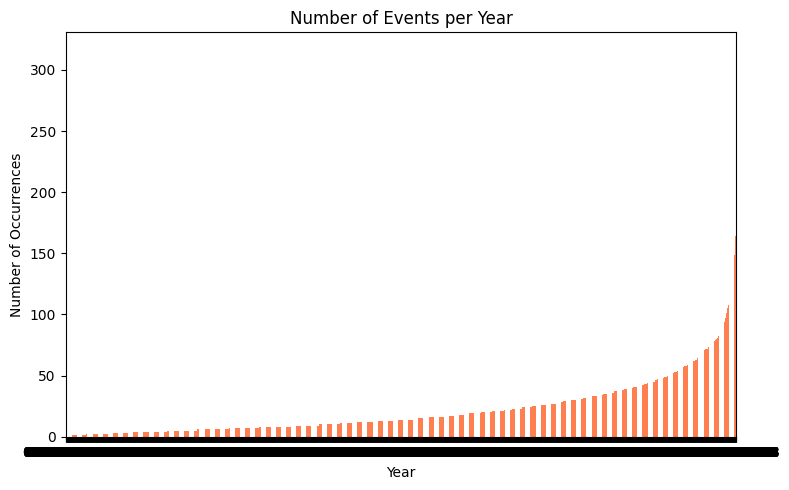

employed_krs
0000370174      1
0000044084      1
0000388909      1
0000412413      1
0000170193      1
             ... 
0000022460    161
0000028860    164
0000012483    166
0000026438    185
0000033455    315
Name: count, Length: 2617, dtype: int64

In [10]:
import matplotlib.pyplot as plt

# 3. Extract the year and count the occurrences
company_counts = people_krs['employed_krs'].value_counts()

# 4. Sort the counts by year (the index) for a chronological chart
company_counts = company_counts.sort_values()

# 5. Create the bar chart
plt.figure(figsize=(8, 5))
ax = company_counts.plot(
    kind='bar',
    color='coral',
    title='Number of Events per Year'
)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0) # Keep year labels horizontal
plt.tight_layout()
plt.show()

company_counts